In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob as tb
import math
import numpy as np
import seaborn as sns

In [3]:
in_folder = r"C:\Users\karlp\Documents\Podcast Analysis Data\transcribed"
in_filename = "Seeds of the Kingdom.txt"

In [4]:
with open(in_folder + "//" + in_filename) as file: 
    text = file.read().lower().split(" ")

n_words_in_group = 300


ls = [" ".join(text[i:i+n_words_in_group]) for i in range(0, len(text), n_words_in_group)]

print(str(len(text))+" words")
print(str(n_words_in_group)+" words per batch")
print(str(len(ls))+" batches")

7423 words
300 words per batch
25 batches


In [5]:
polarity = []
subjectivity = []
for i in ls:
    wiki = tb(i)
    polarity.append(wiki.sentiment.polarity)
    subjectivity.append(wiki.sentiment.subjectivity)

df_pol = pd.DataFrame(polarity)
df_sub = pd.DataFrame(subjectivity)

smoothness = 1

pol = df_pol.rolling(window=smoothness, win_type='triang').mean()
sub = df_sub.rolling(window=smoothness, win_type='triang').mean()

df = pd.concat([pol,sub],axis=1)
df.columns=(['Polarity','Subjectivity'])

In [6]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

bloblist = [tb(x) for x in ls]


ticks = []

for i, blob in enumerate(bloblist):
    ls1=[]
    #print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for i in range(10):
        ls1.append(sorted_words[i][0])
    
    ticks.append(", ".join(ls1))
df['ticks']=ticks


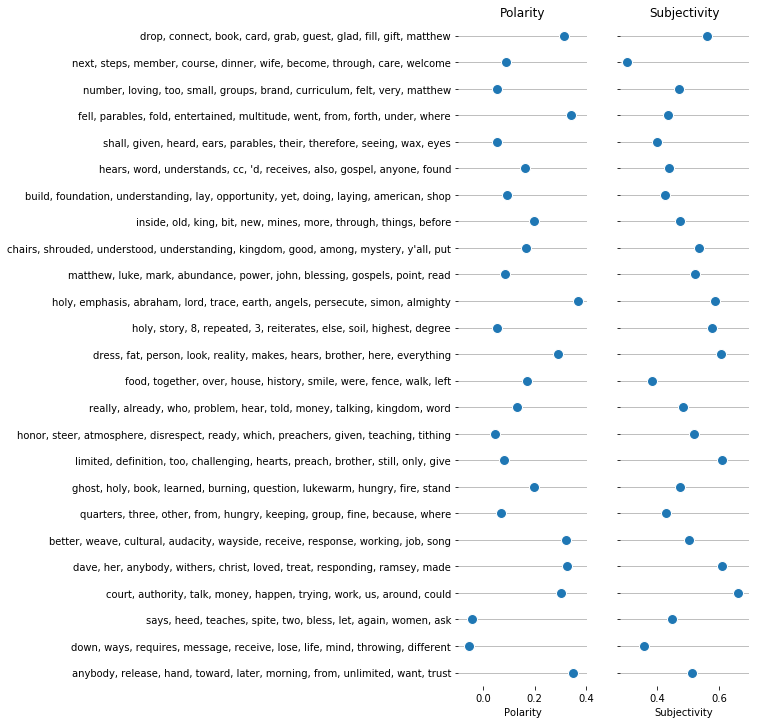

In [8]:
g = sns.PairGrid(df,
                 y_vars=["ticks"],x_vars=df.columns[:2], size=10,
                  aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
       linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, df.columns[:2]):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)